In [1]:
%pip install tensorflow

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80/20 train/val split
)

train_data = datagen.flow_from_directory(
    'PlantVillage',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    'PlantVillage',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])


C:\Users\Lewis\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=5, validation_data=val_data)


C:\Users\Lewis\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 258s 497ms/step - accuracy: 0.3795 - loss: 2.3406 - val_accuracy: 0.7125 - val_loss: 0.9126
Epoch 2/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 243s 470ms/step - accuracy: 0.6902 - loss: 0.9521 - val_accuracy: 0.7880 - val_loss: 0.6414
Epoch 3/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 263s 509ms/step - accuracy: 0.7901 - loss: 0.6302 - val_accuracy: 0.8367 - val_loss: 0.4951
Epoch 4/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 257s 498ms/step - accuracy: 0.8346 - loss: 0.4877 - val_accuracy: 0.8622 - val_loss: 0.4105
Epoch 5/5
517/517 ━━━━━━━━━━━━━━━━━━━━ 275s 531ms/step - accuracy: 0.8728 - loss: 0.3765 - val_accuracy: 0.8547 - val_loss: 0.4431


In [7]:
model.save('crop_disease_model.keras')
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,727,983 (273.62 MB)

 Trainable params: 23,909,327 (91.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,818,656 (182.41 MB)

In [8]:
# Install required packages for similarity engine
%pip install scikit-learn pandas

# Import similarity engine
from similarity_engine import DiseaseSimilarityEngine

# Initialize and train similarity engine
print("🔍 Setting up Disease Similarity Engine...")
similarity_engine = DiseaseSimilarityEngine("disease_descriptions.csv")
similarity_engine.load_and_vectorize()

# Save for later use
similarity_engine.save_model("tfidf_vectorizer.pkl")

print("✅ Disease similarity engine ready!")
print(f"📚 Loaded {len(similarity_engine.df)} disease descriptions")
print(f"🔍 TF-IDF vocabulary size: {len(similarity_engine.vectorizer.vocabulary_)}")

# Test similarity engine on a sample class
sample_class = similarity_engine.df['class_name'].iloc[0]
test_explanation = similarity_engine.explain_prediction(sample_class, 0.95)
print(f"\n🧪 Sample explanation for {sample_class}:")
print(test_explanation)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
🔍 Setting up Disease Similarity Engine...
Model saved to tfidf_vectorizer.pkl
✅ Disease similarity engine ready!
📚 Loaded 21 disease descriptions
🔍 TF-IDF vocabulary size: 326

🧪 Sample explanation for Apple___Apple_scab:
🔎 Detected: Apple - Apple_scab
📊 Confidence: 95.00%

🧠 Related diseases to monitor:
• Potato - Late_blight (similarity: 0.14)
  └─ Severe fungal disease causing large brown lesions on leaves and stems; can quickly destroy the plant under wet conditions.

• Grape - Black_rot (similarity: 0.11)
  └─ Fungal disease causing small black spots on grape leaves; infected fruit shrivels and rots.

• Tomato - Spider_mites Two-spotted_spider_mite (similarity: 0.10)
  └─ Tiny mites causing yellow stippling on leaves and fine webbing; heavy infestation leads to bronzing and leaf drop.




In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_with_explanation(image_path, model, similarity_engine, train_data):
    """Predict disease and provide similarity-based explanation"""
    # Load and preprocess image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    # Get prediction
    predictions = model.predict(img_array)
    predicted_class_idx = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class_idx]
    
    # Get class name from train_data class_indices
    class_names_list = list(train_data.class_indices.keys())
    predicted_class = class_names_list[predicted_class_idx]
    
    # Generate explanation using similarity engine
    explanation = similarity_engine.explain_prediction(predicted_class, confidence)
    
    return {
        'predicted_class': predicted_class,
        'confidence': confidence,
        'explanation': explanation,
        'image_path': image_path
    }


🔮 Testing Enhanced Prediction with Explanations...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step

Image: PlantVillage\Pepper__bell___Bacterial_spot\0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG
Prediction: Pepper__bell___Bacterial_spot
Confidence: 0.9062

🔎 Detected: Pepper__bell - Bacterial_spot
📊 Confidence: 90.62%

🧠 Related diseases to monitor:



In [ ]:

# Test the enhanced prediction on a sample image
import os
sample_class_dir = os.path.join('PlantVillage', train_data.class_indices.keys().__iter__().__next__())
sample_images = os.listdir(sample_class_dir)
sample_image_path = os.path.join(sample_class_dir, sample_images[0])

print("🔮 Testing Enhanced Prediction with Explanations...")
result = predict_with_explanation(sample_image_path, model, similarity_engine, train_data)

print(f"\nImage: {result['image_path']}")
print(f"Prediction: {result['predicted_class']}")
print(f"Confidence: {result['confidence']:.4f}")
print("\n" + "="*60)
print(result['explanation'])

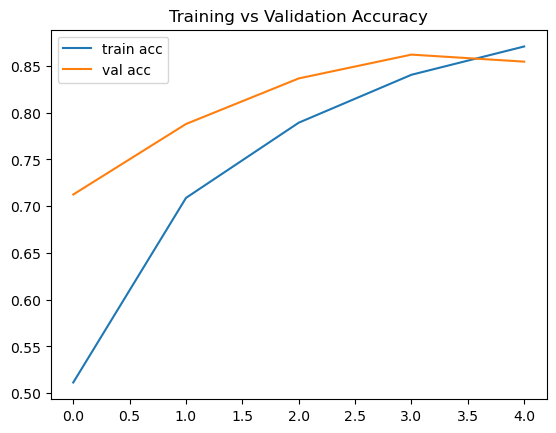

In [5]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
